In [35]:
import glob
d = glob.glob('data/raw/*_*_0[1-4]*')
d

['data/raw/01_01_02_4F実験室_XperiaZ3_カバン_裏上_正常_まっすぐ帰宅',
 'data/raw/02_03_03_4F実験室_iphone_カバン_裏上_異常_まっすぐ帰宅',
 'data/raw/02_11_01_エネマネハウス_iphone_胸ポケット_裏上_正常_まっすぐ帰宅',
 'data/raw/01_12_03_エネマネハウス_XperiaZ3_カバン_裏上_異常_まっすぐ外出',
 'data/raw/02_01_01_4F実験室_iphone_胸ポケット_裏上_正常_まっすぐ帰宅',
 'data/raw/01_12_01_エネマネハウス_XperiaZ3_胸ポケット_裏上_異常_まっすぐ外出',
 'data/raw/02_12_02_エネマネハウス_iphone_ズボン_裏上_異常_まっすぐ外出',
 'data/raw/02_03_01_4F実験室_iphone_胸ポケット_裏上_異常_まっすぐ帰宅',
 'data/raw/02_01_04_4F実験室_iphone_カバン_裏上_正常_5秒後まっすぐ帰宅',
 'data/raw/02_11_02_エネマネハウス_iphone_カバン_裏上_正常_まっすぐ帰宅',
 'data/raw/01_02_03_4F実験室_XperiaZ3_カバン_裏上_異常_まっすぐ外出',
 'data/raw/01_01_03_4F実験室_XperiaZ3_胸ポケット_裏上_正常_5秒後まっすぐ帰宅',
 'data/raw/01_11_04_エネマネハウス_XperiaZ3_カバン_裏上_正常_5秒後まっすぐ帰宅',
 'data/raw/01_02_02_4F実験室_XperiaZ3_ズボン_裏上_異常_まっすぐ外出',
 'data/raw/02_01_03_4F実験室_iphone_胸ポケット_裏上_正常_5秒後まっすぐ帰宅',
 'data/raw/02_02_02_4F実験室_iphone_ズボン_裏上_異常_まっすぐ外出',
 'data/raw/01_01_04_4F実験室_XperiaZ3_カバン_裏上_正常_5秒後まっすぐ帰宅',
 'data/raw/02_12_01_エネマネハウス_iphone_胸ポケット_裏上_異常_まっすぐ外出',
 'dat

In [146]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
f = glob.glob(d[0] + '/*.csv')
df = pd.read_csv(f[0])

# remove unsaved parameters
del df['temperature']
del df['humidity']
del df['proximity']

# remove data while rssi is not recorded
first_rssi_idx = np.where(df['rssi(A)'].as_matrix() != -1)[0][0]
first_rssi_idx
df = df.ix[first_rssi_idx:, :]

# adjust the value of button pushed data 
df.loc[df['btn_push'] == -1, 'btn_push'] = 0

# convert -1 to NaN
df[df == -1] = np.nan

# interpolate NaN
df = df.apply(pd.Series.interpolate)

df.head()

,date,rssi(A),rssi(B),remote_rssi,linear_accel[0],linear_accel[1],linear_accel[2],accelerometer[0],accelerometer[1],accelerometer[2],...,game_rotation[0],game_rotation[1],game_rotation[2],game_rotation[3],magnetic[0],magnetic[1],magnetic[2],pressure,light,btn_push
107,2017/04/06 14:28:21.083,-62.0,-62.000000,-71.0,0.090845,0.004838,0.027184,0.899765,2.616501,9.342575,...,0.125277,0.060564,0.685313,0.714831,26.399834,-0.644684,-19.247437,1017.8006,NaN,0.0
108,2017/04/06 14:28:21.104,-62.5,-62.500000,-71.0,0.089620,0.033553,0.112939,0.901459,2.517746,9.372040,...,0.125155,0.060246,0.685279,0.714912,26.581413,-0.644684,-19.335365,1017.8006,NaN,0.0
109,2017/04/06 14:28:21.124,-63.0,-63.000000,-77.0,0.039549,-0.045911,0.032760,0.837555,2.473556,9.290390,...,0.124676,0.060057,0.685231,0.715057,26.581413,-0.553894,-19.598960,1017.8006,NaN,0.0
110,2017/04/06 14:28:21.146,-67.5,-63.428571,-77.0,-0.031803,0.027175,-0.017484,0.820038,2.491074,9.257919,...,0.124324,0.060083,0.685190,0.715156,26.581413,-0.644684,-19.511032,1017.8006,NaN,0.0
111,2017/04/06 14:28:21.171,-72.0,-63.857143,-70.0,0.055341,-0.008506,-0.027890,0.909302,2.522125,9.250946,...,0.124208,0.060030,0.685191,0.715180,26.581413,-0.826263,-19.686890,1017.8006,NaN,0.0


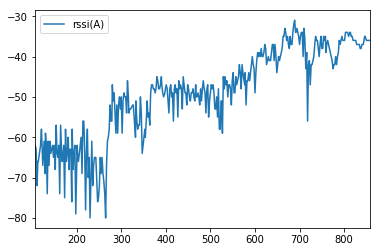

In [148]:
df[['rssi(A)']].plot()